## exe-1) 유방암 양성/음성 여부 판단을 위한 모델 선정


In [10]:
from sklearn.datasets import load_breast_cancer

brast_cancer_data = load_breast_cancer()
brast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [99]:

from sklearn.preprocessing import StandardScaler #클래스 (모델 )생성
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier  #결정트리
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params_gs = {'min_impurity_decrease' : np.arange(0.0001,0.001,0.0001),
          'max_depth' : range(5,20,1),
          'min_samples_split' : range(2,100,10)}

params_rs = {'min_impurity_decrease' : uniform(0.0001,0.001),
          'max_depth' :randint(20,50),
          'min_samples_split' : randint(2,25),}


### 클래스(모델) 생성
ss= StandardScaler()
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
dt= DecisionTreeClassifier(random_state=42)
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state =42)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params_gs,cv=splitter, n_jobs = -1)
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state =42),params,n_iter=15, n_jobs =-1,random_state=42)


### scores
scores_dt = cross_validate(dt,train_input, train_target)
scores_sfkf = cross_validate(dt, train_input, train_target,cv = StratifiedKFold())
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled =ss.transform(test_input)

sc.fit(train_scaled, train_target)
print('-sc-------------------------------')
print('SGDClassifier 훈련 score =',sc.score(train_scaled, train_target))
print('SGDClassifier 훈련 score =',sc.score(test_scaled, test_target))
print('----------------------------------')
print('-sc.partial-------------------------------')
sc.partial_fit(train_scaled, train_target)
print('----------------------------------')
print('SGDClassifier 훈련 score =',sc.score(train_scaled, train_target))
print('SGDClassifier 훈련 score =',sc.score(test_scaled, test_target))
print('----------------------------------')
### 교차 검증
scores_sfkf_spl = cross_validate(dt, train_input, train_target,cv = splitter)

#결정 트리
# - SGDClassifier모델을 이용한 score점수가 제일 적합했음
# - 

gs.fit(train_input, train_target)
print(gs.best_estimator_)
dt_gs =gs.best_estimator_

###랜덤 서치
print('-rs-------------------------------')
rgen = randint(0, 10)
rs.fit(train_input, train_target)
dt_rs =gs.best_estimator_
print('가장 높은 평가점수',np.max(rs.cv_results_['mean_test_score']))
print(gs.best_params_)
print('RandomizedSearchCV 훈련 score',dt_rs.score(train_input,train_target))
print('RandomizedSearchCV 최종 score',dt_rs.score(test_input,test_target))

###
print('-gs-------------------------------')
print('GridSearchCV 훈련 score =',dt_gs.score(train_input, train_target))
print('GridSearchCV 최종 score =',dt_gs.score(test_input, test_target))
print('---------------------------------')
# print(gs.cv_results_)
# print('---------------------------------')
# print(gs.cv_results_.keys())


##
print('---------------------------------')
print('DecisionTreeClassifier 최종 score = ' , np.mean(scores_dt['test_score']))
print('---------------------------------')
print('k-fold최종 score = ' , np.mean(scores_sfkf['test_score']))
print('k-fold_splitter 최종 score = ' , np.mean(scores_sfkf_spl['test_score']))

### (해석)
# - SGDClassifier가 적합도가 제일 좋고
# - k-fold 및 결정트리는 학습능력이 다소 떨어집니다

-sc-------------------------------
SGDClassifier 훈련 score = 0.9859154929577465
SGDClassifier 훈련 score = 0.965034965034965
----------------------------------
-sc.partial-------------------------------
----------------------------------
SGDClassifier 훈련 score = 0.9859154929577465
SGDClassifier 훈련 score = 0.965034965034965
----------------------------------
DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001,
                       random_state=42)
-rs-------------------------------
가장 높은 평가점수 0.9365800273597811
{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
RandomizedSearchCV 훈련 score 0.9953051643192489
RandomizedSearchCV 최종 score 0.958041958041958
-gs-------------------------------
GridSearchCV 훈련 score = 0.9953051643192489
GridSearchCV 최종 score = 0.958041958041958
---------------------------------
---------------------------------
DecisionTreeClassifier 최종 score =  0.9271682626538986
---------------------------------
k-fold최종 score =  0.927168262

### 에포크 반복 횟수 찾기

In [92]:
sc= SGDClassifier(loss ='log', random_state = 42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


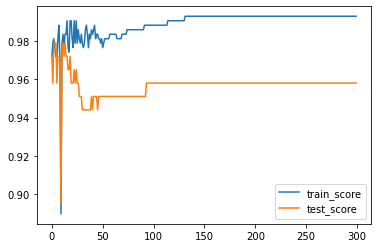

In [93]:
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

## (해석)
# 10번째에서 정확도가 좋음


## 앙상블

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_validate

In [19]:
data = brast_cancer_data['data']
target = brast_cancer_data['target']

train_input, test_input, train_target, test_target = train_test_split( \
    data,target,random_state =42)

In [44]:
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
et = ExtraTreesClassifier(n_jobs=-1,random_state=42)
gb=GradientBoostingClassifier(random_state=42)
hgb=HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(tree_method='hist', random_state=42)
lgb=LGBMClassifier()


scores_rf = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
scores_et = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
scores_gb = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
scores_hgb= cross_validate(hgb,train_input, train_target, return_train_score=True, n_jobs=-1)
scores_xgb= cross_validate(xgb,train_input, train_target, return_train_score=True, n_jobs=-1)
scores_lgb= cross_validate(lgb,train_input, train_target, return_train_score=True, n_jobs=-1)


print('랜덤포레스트 =                 ',np.mean(scores_rf['train_score']),np.mean(scores_rf['test_score']))
print('엑스트라 트리 =                ',np.mean(scores_et['train_score']),np.mean(scores_et['test_score']))
print('그라디언트 부스트 =            ',np.mean(scores_gb['train_score']),np.mean(scores_gb['test_score']))
print('히스토그램 그라디언트 부스트 = ',np.mean(scores_hgb['train_score']),np.mean(scores_hgb['test_score']))
print('XGBoost =                      ',np.mean(scores_xgb['train_score']),np.mean(scores_xgb['test_score']))
print('LightGBM =                     ',np.mean(scores_lgb['train_score']),np.mean(scores_lgb['test_score']))

rf.fit(train_input,train_target)
et.fit(train_input,train_target)
gb.fit(train_input,train_target)
hgb.fit(train_input,train_target)
xgb.fit(train_input,train_target)
lgb.fit(train_input,train_target)



print('랜덤포레스트 =                 ',rf.feature_importances_)
print('-------------------------------------------------------')
print('엑스트라 트리 =                ',et.feature_importances_)
print('-------------------------------------------------------')
print('그라디언트 부스트 =            ',gb.feature_importances_)
print('-------------------------------------------------------')
print('히스토그램 그라디언트 부스트 = ',hgb.score(test_input,test_target))
print('-------------------------------------------------------')
print('XGBoost =                      ',xgb.feature_importances_)

### (해석)
# - 엑스트라 트리가 적합성이 가장 좋음



랜덤포레스트 =                  1.0 0.9577291381668946
엑스트라 트리 =                 1.0 0.9623803009575924
그라디언트 부스트 =             1.0 0.9506703146374831
히스토그램 그라디언트 부스트 =  1.0 0.9600820793433653
XGBoost =                       1.0 0.9577017783857729
LightGBM =                      1.0 0.962435020519836
랜덤포레스트 =                  [0.03971058 0.01460399 0.05314639 0.04277978 0.00816485 0.01140166
 0.08321459 0.0902992  0.00443533 0.00443395 0.01951684 0.00459978
 0.00868228 0.04355077 0.00464415 0.0036549  0.00701442 0.00504716
 0.00371411 0.00658253 0.08127686 0.01649014 0.07138828 0.12319232
 0.01033481 0.01580059 0.03174022 0.17229521 0.01310266 0.00518165]
-------------------------------------------------------
엑스트라 트리 =                 [0.06526478 0.02263436 0.04037335 0.04137443 0.01127867 0.03141925
 0.06792653 0.07436193 0.00680299 0.00864427 0.01592531 0.00632018
 0.01699375 0.0355914  0.00717712 0.0077469  0.00781951 0.01101074
 0.00687928 0.00718805 0.10172404 0.02771603 0.10386939 0.0

In [70]:
a = []
for i in brast_cancer_data['feature_names']:
    a.append(i)


# df =pd.DataFrame(gb.feature_importances_, index=a).T
df_rf =pd.DataFrame(rf.feature_importances_)
df_et =pd.DataFrame(et.feature_importances_)
df_gb =pd.DataFrame(gb.feature_importances_)

df_xgb =pd.DataFrame(xgb.feature_importances_)

df= pd.DataFrame(a)
df['rf']=df_rf
df['et']=df_et
df['gb']=df_gb
df['xgb']=df_xgb
df1 = df.transpose()
df2 = df1.rename(columns=df1.iloc[0])
df3 = df2.drop(df2.index[0])

df3


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
rf,0.039711,0.014604,0.053146,0.04278,0.008165,0.011402,0.083215,0.090299,0.004435,0.004434,...,0.081277,0.01649,0.071388,0.123192,0.010335,0.015801,0.03174,0.172295,0.013103,0.005182
et,0.065265,0.022634,0.040373,0.041374,0.011279,0.031419,0.067927,0.074362,0.006803,0.008644,...,0.101724,0.027716,0.103869,0.064401,0.01959,0.023897,0.058871,0.085071,0.014078,0.00805
gb,0.000787,0.021596,0.000543,0.000047,0.000147,0.004089,0.000029,0.474446,0.000481,0.000152,...,0.065656,0.048631,0.030344,0.043812,0.004098,0.000668,0.016513,0.235177,0.002152,0.00009
xgb,0.009419,0.017972,0.0,0.008364,0.008969,0.005433,0.000733,0.360392,0.002927,0.004793,...,0.049381,0.024448,0.075963,0.031635,0.004611,0.003886,0.015252,0.272532,0.002999,0.0


In [1]:
##각각 해당되는 것들 다 해보고
#전체 해석 달아보기